In [1]:
!pip install scikit-optimize

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.3/100.3 kB 8.1 MB/s eta 0:00:00


In [3]:
import time
import pandas as pd
import numpy as np
import scipy as sp
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import sklearn.model_selection
from sklearn.manifold import TSNE

from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xgb
import lightgbm as lgbm
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import SGDClassifier


from skopt import gp_minimize
from skopt.space import Real, Integer
from skopt.utils import use_named_args
from skopt.plots import plot_convergence

import seaborn as sns
sns.set_style("darkgrid")

import warnings
warnings.filterwarnings("ignore")

In [4]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [7]:
data=pd.read_csv('gdrive/My Drive/EGSS_Data.csv')

In [9]:
data.head()

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stab,stabf
0,2.959060,3.079885,8.381025,9.780754,3.763085,-0.782604,-1.257395,-1.723086,0.650456,0.859578,0.887445,0.958034,0.055347,unstable
1,9.304097,4.902524,3.047541,1.369357,5.067812,-1.940058,-1.872742,-1.255012,0.413441,0.862414,0.562139,0.781760,-0.005957,stable
2,8.971707,8.848428,3.046479,1.214518,3.405158,-1.207456,-1.277210,-0.920492,0.163041,0.766689,0.839444,0.109853,0.003471,unstable
3,0.716415,7.669600,4.486641,2.340563,3.963791,-1.027473,-1.938944,-0.997374,0.446209,0.976744,0.929381,0.362718,0.028871,unstable
4,3.134112,7.608772,4.943759,9.857573,3.525811,-1.125531,-1.845975,-0.554305,0.797110,0.455450,0.656947,0.820923,0.049860,unstable


In [10]:
data

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stab,stabf
0,2.959060,3.079885,8.381025,9.780754,3.763085,-0.782604,-1.257395,-1.723086,0.650456,0.859578,0.887445,0.958034,0.055347,unstable
1,9.304097,4.902524,3.047541,1.369357,5.067812,-1.940058,-1.872742,-1.255012,0.413441,0.862414,0.562139,0.781760,-0.005957,stable
2,8.971707,8.848428,3.046479,1.214518,3.405158,-1.207456,-1.277210,-0.920492,0.163041,0.766689,0.839444,0.109853,0.003471,unstable
3,0.716415,7.669600,4.486641,2.340563,3.963791,-1.027473,-1.938944,-0.997374,0.446209,0.976744,0.929381,0.362718,0.028871,unstable
4,3.134112,7.608772,4.943759,9.857573,3.525811,-1.125531,-1.845975,-0.554305,0.797110,0.455450,0.656947,0.820923,0.049860,unstable
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,2.930406,9.487627,2.376523,6.187797,3.343416,-0.658054,-1.449106,-1.236256,0.601709,0.779642,0.813512,0.608385,0.023892,unstable
9996,3.392299,1.274827,2.954947,6.894759,4.349512,-1.663661,-0.952437,-1.733414,0.502079,0.567242,0.285880,0.366120,-0.025803,stable
9997,2.364034,2.842030,8.776391,1.008906,4.299976,-1.380719,-0.943884,-1.975373,0.487838,0.986505,0.149286,0.145984,-0.031810,stable
9998,9.631511,3.994398,2.757071,7.821347,2.514755,-0.966330,-0.649915,-0.898510,0.365246,0.587558,0.889118,0.818391,0.037789,unstable


In [11]:
df

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stab,stabf
0,2.959060,3.079885,8.381025,9.780754,3.763085,-0.782604,-1.257395,-1.723086,0.650456,0.859578,0.887445,0.958034,0.055347,unstable
1,9.304097,4.902524,3.047541,1.369357,5.067812,-1.940058,-1.872742,-1.255012,0.413441,0.862414,0.562139,0.781760,-0.005957,stable
2,8.971707,8.848428,3.046479,1.214518,3.405158,-1.207456,-1.277210,-0.920492,0.163041,0.766689,0.839444,0.109853,0.003471,unstable
3,0.716415,7.669600,4.486641,2.340563,3.963791,-1.027473,-1.938944,-0.997374,0.446209,0.976744,0.929381,0.362718,0.028871,unstable
4,3.134112,7.608772,4.943759,9.857573,3.525811,-1.125531,-1.845975,-0.554305,0.797110,0.455450,0.656947,0.820923,0.049860,unstable
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,2.930406,9.487627,2.376523,6.187797,3.343416,-0.658054,-1.449106,-1.236256,0.601709,0.779642,0.813512,0.608385,0.023892,unstable
9996,3.392299,1.274827,2.954947,6.894759,4.349512,-1.663661,-0.952437,-1.733414,0.502079,0.567242,0.285880,0.366120,-0.025803,stable
9997,2.364034,2.842030,8.776391,1.008906,4.299976,-1.380719,-0.943884,-1.975373,0.487838,0.986505,0.149286,0.145984,-0.031810,stable
9998,9.631511,3.994398,2.757071,7.821347,2.514755,-0.966330,-0.649915,-0.898510,0.365246,0.587558,0.889118,0.818391,0.037789,unstable


In [12]:
#dropped stab column
df = df.drop("stab", axis=1)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   tau1    10000 non-null  float64
 1   tau2    10000 non-null  float64
 2   tau3    10000 non-null  float64
 3   tau4    10000 non-null  float64
 4   p1      10000 non-null  float64
 5   p2      10000 non-null  float64
 6   p3      10000 non-null  float64
 7   p4      10000 non-null  float64
 8   g1      10000 non-null  float64
 9   g2      10000 non-null  float64
 10  g3      10000 non-null  float64
 11  g4      10000 non-null  float64
 12  stabf   10000 non-null  object 
dtypes: float64(12), object(1)
memory usage: 1015.8+ KB


In [14]:
df.isnull().sum()

tau1     0
tau2     0
tau3     0
tau4     0
p1       0
p2       0
p3       0
p4       0
g1       0
g2       0
g3       0
g4       0
stabf    0
dtype: int64

<Axes: >

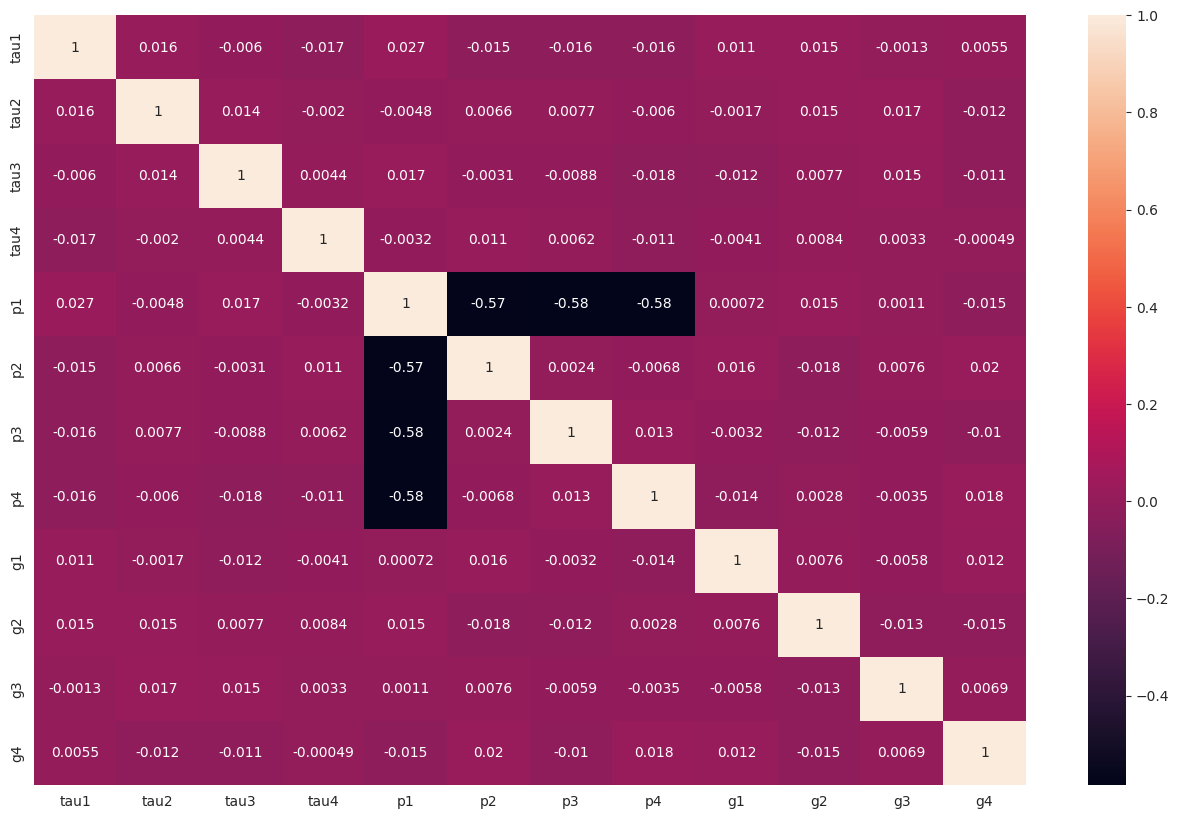

In [15]:
plt.figure(figsize=(16,10))
sns.heatmap(df.corr(method='pearson'), annot=True)

In [16]:
print(df.shape)  # Check the shape of the DataFrame

(10000, 13)


In [17]:
df.describe()

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5.250000,5.250001,5.250004,5.249997,3.750000,-1.250000,-1.250000,-1.250000,0.525000,0.525000,0.525000,0.525000
std,2.742548,2.742549,2.742549,2.742556,0.752160,0.433035,0.433035,0.433035,0.274256,0.274255,0.274255,0.274255
min,0.500793,0.500141,0.500788,0.500473,1.582590,-1.999891,-1.999945,-1.999926,0.050009,0.050053,0.050054,0.050028
25%,2.874892,2.875140,2.875522,2.874950,3.218300,-1.624901,-1.625025,-1.624960,0.287521,0.287552,0.287514,0.287494
50%,5.250004,5.249981,5.249979,5.249734,3.751025,-1.249966,-1.249974,-1.250007,0.525009,0.525003,0.525015,0.525002
75%,7.624690,7.624893,7.624948,7.624838,4.282420,-0.874977,-0.875043,-0.875065,0.762435,0.762490,0.762440,0.762433
max,9.999469,9.999837,9.999450,9.999443,5.864418,-0.500108,-0.500072,-0.500025,0.999937,0.999944,0.999982,0.999930


In [18]:
df.isnull().sum()  # Check for missing values

tau1     0
tau2     0
tau3     0
tau4     0
p1       0
p2       0
p3       0
p4       0
g1       0
g2       0
g3       0
g4       0
stabf    0
dtype: int64

In [19]:
df.stabf.head()

0    unstable
1      stable
2    unstable
3    unstable
4    unstable
Name: stabf, dtype: object

In [20]:
#Replace the stabf values with numbers 0 and 1
df.stabf = (df.stabf == 'stable').astype(int)

In [21]:
df.stabf.head()

0    0
1    1
2    0
3    0
4    0
Name: stabf, dtype: int64

In [22]:
x = df.iloc[:,1:-1].values
y = df.iloc[:,-1].values

print('X Shape', x.shape)
print('Y Shape',y.shape)

X Shape (10000, 11)
Y Shape (10000,)


In [35]:
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=1)

print('Number transactions x_train df',X_train.shape)
print('Number transactions x_test df',X_test.shape)
print('Number transactions y_train df',y_train.shape)
print('Number transactions y_test df',y_test.shape)

Number transactions x_train df (8000, 11)
Number transactions x_test df (2000, 11)
Number transactions y_train df (8000,)
Number transactions y_test df (2000,)


In [23]:
x

array([[3.0798852 , 8.38102539, 9.78075443, ..., 0.85957811, 0.88744492,
        0.95803399],
       [4.90252411, 3.04754073, 1.36935736, ..., 0.86241408, 0.56213905,
        0.78175991],
       [8.84842842, 3.04647875, 1.21451814, ..., 0.76668866, 0.83944402,
        0.10985324],
       ...,
       [2.84203025, 8.77639096, 1.00890638, ..., 0.98650532, 0.14928646,
        0.14598403],
       [3.9943976 , 2.75707093, 7.82134718, ..., 0.58755755, 0.88911835,
        0.81839133],
       [6.7817899 , 4.34969522, 8.6731382 , ..., 0.50544105, 0.37876093,
        0.94263083]])

In [24]:
y

array([0, 1, 0, ..., 1, 0, 0])

In [25]:
df_train, df_test = train_test_split(df, test_size=0.2, random_state=1)

In [26]:
len(df_train), len(df_test)

(8000, 2000)

In [27]:
df_train.shape

(8000, 13)

In [28]:
df_test.shape

(2000, 13)

In [29]:
y_train = df_train.stabf.values
y_test = df_test.stabf.values

In [30]:
#shuffle the indexes
df_train = df_train.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [31]:
df_train.stabf

0       0
1       0
2       0
3       0
4       0
       ..
7995    1
7996    1
7997    0
7998    0
7999    1
Name: stabf, Length: 8000, dtype: int64

In [32]:
df_train.stabf.value_counts()

0    5092
1    2908
Name: stabf, dtype: int64

In [33]:
#we can look at the percentage by using normalize
df_train.stabf.value_counts(normalize=True)

0    0.6365
1    0.3635
Name: stabf, dtype: float64

In [36]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [37]:
# Define a dictionary to store the results
results = {}

In [38]:
%%time
start_time = time.time()
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

end_time = time.time()
training_time = end_time - start_time

results['Random Forest'] = [accuracy_score(y_test, y_pred),
                                  precision_score(y_test, y_pred, average='weighted'),
                                  recall_score(y_test, y_pred, average='weighted'),
                                  f1_score(y_test, y_pred, average='weighted'),
                                  training_time]

CPU times: user 2.16 s, sys: 1.15 ms, total: 2.16 s
Wall time: 2.47 s


In [39]:
%%time
start_time = time.time()
et = ExtraTreesClassifier()
et.fit(X_train, y_train)
y_pred = et.predict(X_test)

end_time = time.time()
training_time = end_time - start_time

results['Extra Trees'] = [accuracy_score(y_test, y_pred),
                                  precision_score(y_test, y_pred, average='weighted'),
                                  recall_score(y_test, y_pred, average='weighted'),
                                  f1_score(y_test, y_pred, average='weighted'),
                                  training_time]

CPU times: user 761 ms, sys: 12.3 ms, total: 773 ms
Wall time: 776 ms


In [40]:
%%time
start_time = time.time()
xgboost = xgb.XGBClassifier()
xgboost.fit(X_train, y_train)
y_pred = xgboost.predict(X_test)

end_time = time.time()
training_time = end_time - start_time

results['XGBoost'] = [accuracy_score(y_test, y_pred),
                                  precision_score(y_test, y_pred, average='weighted'),
                                  recall_score(y_test, y_pred, average='weighted'),
                                  f1_score(y_test, y_pred, average='weighted'),
                                  training_time]

CPU times: user 2.98 s, sys: 1.37 ms, total: 2.98 s
Wall time: 1.59 s


In [41]:
%%time
start_time = time.time()
lgbm = lgbm.LGBMClassifier()
lgbm.fit(X_train, y_train)
y_pred = lgbm.predict(X_test)

end_time = time.time()
training_time = end_time - start_time

results['LightGBM'] = [accuracy_score(y_test, y_pred),
                                  precision_score(y_test, y_pred, average='weighted'),
                                  recall_score(y_test, y_pred, average='weighted'),
                                  f1_score(y_test, y_pred, average='weighted'),
                                  training_time]

CPU times: user 568 ms, sys: 5.39 ms, total: 573 ms
Wall time: 584 ms


In [42]:
# Create a DataFrame from the results
df_results = pd.DataFrame.from_dict(results, orient='index', columns=['Accuracy', 'Precision', 'Recall', 'F1-Score', 'Training Time'])

df_results

,Accuracy,Precision,Recall,F1-Score,Training Time
Random Forest,0.8585,0.857189,0.8585,0.857137,2.462749
Extra Trees,0.8615,0.860951,0.8615,0.858951,0.770519
XGBoost,0.8600,0.859457,0.8600,0.859683,1.581870
LightGBM,0.8595,0.859059,0.8595,0.859252,0.578332


In [43]:
#Tuning LGBM with Bayesian Optimisation

import lightgbm as lgbm

# Define the hyperparameter search space
space = [Real(0.01, 1.0, name='learning_rate'),
         Integer(1, 1000, name='n_estimators'),
         Integer(1, 20, name='max_depth'),
         Integer(2, 100, name='num_leaves'),
         Real(0.1, 1.0, name='subsample'),
         Real(0.1, 1.0, name='colsample_bytree'),
         Integer(2, 100, name='min_child_samples')]

# Define the objective function to be maximized
@use_named_args(space)
def objective(**params):
    clf = lgbm.LGBMClassifier(**params)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    score = accuracy_score(y_test, y_pred)
    return -score

# Define a function to keep track of the best set of hyperparameters seen so far
best_score = None
best_params = None
def on_step(optim_result):
    global best_score, best_params
    score = -optim_result.fun
    params = optim_result.x
    if best_score is None or score > best_score:
        best_score = score
        best_params = params
    print("Best score: %0.4f | Best params: %s" % (best_score, best_params))

# Run Bayesian optimization with Gaussian Processes
res = gp_minimize(objective, space, n_calls=50, random_state=42, callback=on_step, verbose=True)

Iteration No: 1 started. Evaluating function at random point.
Best score: 0.7840 | Best params: [0.7985775569916307, 184, 16, 60, 0.5012494775682321, 0.18997742423620262, 47]
Iteration No: 1 ended. Evaluation done at random point.
Time taken: 1.1410
Function value obtained: -0.7840
Current minimum: -0.7840
Iteration No: 2 started. Evaluating function at random point.
Best score: 0.8585 | Best params: [0.3403715250276317, 144, 13, 8, 0.7497988950401424, 0.9446974381141754, 2]
Iteration No: 2 ended. Evaluation done at random point.
Time taken: 0.1098
Function value obtained: -0.8585
Current minimum: -0.8585
Iteration No: 3 started. Evaluating function at random point.
Best score: 0.8585 | Best params: [0.3403715250276317, 144, 13, 8, 0.7497988950401424, 0.9446974381141754, 2]
Iteration No: 3 ended. Evaluation done at random point.
Time taken: 0.2139
Function value obtained: -0.8320
Current minimum: -0.8585
Iteration No: 4 started. Evaluating function at random point.
Best score: 0.8625 |

<Axes: title={'center': 'Convergence plot'}, xlabel='Number of calls $n$', ylabel='$\\min f(x)$ after $n$ calls'>

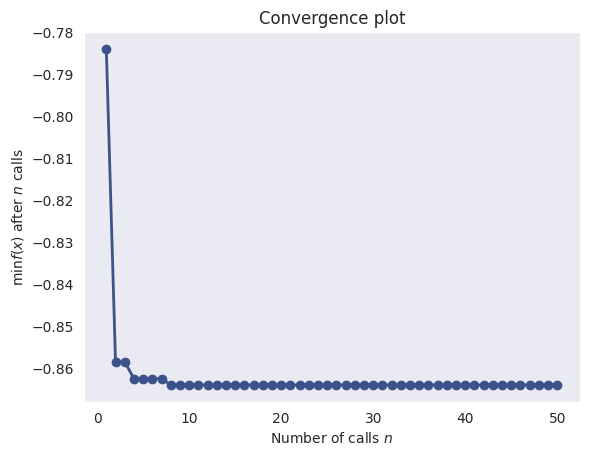

In [44]:
# Plot the convergence of the optimization process
plot_convergence(res)

In [45]:
# Print the best set of hyperparameters seen during the optimization process
print("Best hyperparameters: ", dict(zip([dim.name for dim in space], best_params)))
print("Accuracy on test set: ", -res.fun)

Best hyperparameters:  {'learning_rate': 0.04100015953100301, 'n_estimators': 842, 'max_depth': 10, 'num_leaves': 41, 'subsample': 0.9339929792144149, 'colsample_bytree': 0.7545447962707789, 'min_child_samples': 34}
Accuracy on test set:  0.864


Hyperparameter Tuning of XGBoost

              precision    recall  f1-score   support

           0       0.88      0.90      0.89      1288
           1       0.82      0.78      0.80       712

    accuracy                           0.86      2000
   macro avg       0.85      0.84      0.85      2000
weighted avg       0.86      0.86      0.86      2000

Accuracy Score:  0.86


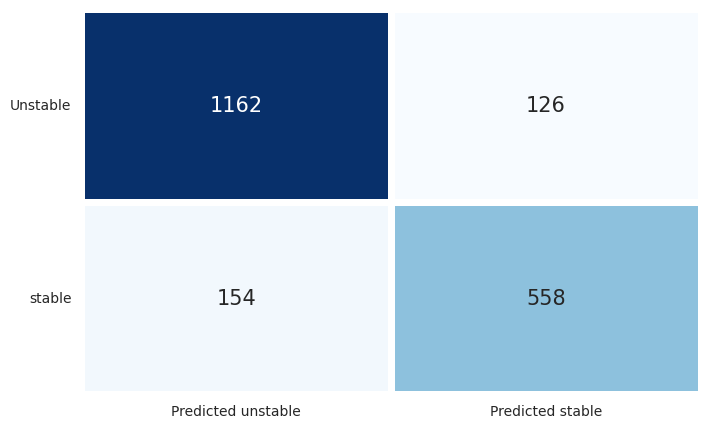

In [50]:
from xgboost import XGBClassifier
classifier = XGBClassifier(eval_metric= 'error', learning_rate= 0.1)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
y_prob = classifier.predict_proba(X_test)[:,1]
cm = confusion_matrix(y_test, y_pred)

print(classification_report(y_test, y_pred))
print('Accuracy Score: ',accuracy_score(y_test, y_pred))

# Visualizing Confusion Matrix
plt.figure(figsize = (8, 5))
sns.heatmap(cm, cmap = 'Blues', annot = True, fmt = 'd', linewidths = 5, cbar = False, annot_kws = {'fontsize': 15},
            yticklabels = ['Unstable', 'stable'], xticklabels = ['Predicted unstable', 'Predicted stable'])
plt.yticks(rotation = 0)
plt.show()

Conclusion:

We can see that after Tuning, LGBM accuracy improved while XGBoost accuracy remains thesame.